In [ ]:
from langchain_openai import ChatOpenAI 
from dotenv import load_dotenv
import os
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, START, END, MessagesState 
from langchain_core.messages import SystemMessage, HumanMessage
from IPython.display import display, Image
from tools.visit_web_page_tool import VisitWebPageSyncTool
from functions.atom_feed_find_func import AtomFeedFindTool
from functions.atom_feed_read_func import AtomFeedReadTool
from langgraph.checkpoint.memory import MemorySaver

In [21]:
load_dotenv()

True

In [13]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [14]:
llm_with_tools = llm.bind_tools([VisitWebPageSyncTool(), 
                                 AtomFeedFindTool(), 
                                 AtomFeedReadTool()])

In [15]:
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [16]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([VisitWebPageSyncTool(), 
                                    AtomFeedFindTool(), 
                                    AtomFeedReadTool()]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition, "tools")
builder.add_edge("tools", "tool_calling_llm")
builder.add_edge("tools", END)

In [17]:
graph = builder.compile(checkpointer=MemorySaver())

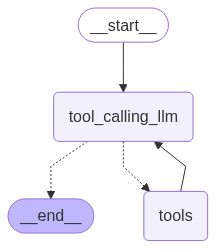

In [18]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
messages = [HumanMessage(content="visit https://www.thecloudcast.net and from the podcast archive get all podcast links.")]

In [20]:
config = {"configurable": {"thread_id": 1}}
output = graph.invoke({"messages": messages}, config=config)
for item in output["messages"]:
    item.pretty_print()

browser =  <Browser type=<BrowserType name=chromium executable_path=/Users/mahadevgaonkar/Library/Caches/ms-playwright/chromium-1169/chrome-mac/Chromium.app/Contents/MacOS/Chromium> version=136.0.7103.25>
page =  <Page url='about:blank'>
page title: The Cloudcast
================================ Human Message =================================

visit https://www.thecloudcast.net and from the podcast archive get all podcast links.
================================== Ai Message ==================================
Tool Calls:
  visit_webpage (call_hYS4hIEr6yBoFXgGMBwUpUFk)
 Call ID: call_hYS4hIEr6yBoFXgGMBwUpUFk
  Args:
    url: https://www.thecloudcast.net
================================= Tool Message =================================
Name: visit_webpage

Sunday, May 18, 2025 Listen to The Cloudcast Posted by Brian Gracely Where do Developer-Assistants go next with AI? Where does the next phase of AI-assistants for software development go next? Is it an evolution of developer productivity,